# Diabetes Data Analysis : Can we know if people are prone to diabetes based on other parameters of my body?

#### I am analyzing a diabetes data set with the following columns :
##### Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and Outcome
##### Outcome is a binary column where '0' means that the person is not diabetic and '1' means that a person is diabetic

#### The Aim : To assess if the other parameters are a contributing factor for a person to have diabetes


###### Author : Nikitaa Kenkre | MS in Management of Technology

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
# Reading the Data set

diabetes = pd.read_csv('/Users/nikitaakenkre/Desktop/NYU Coursework/DS Bootcamp/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Cleaning : Removing Missing values

In [3]:
# Checking for Missing Values
missing_values = diabetes.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values)

total_missing_values = diabetes.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Total missing values in the DataFrame: 0


In [4]:
# Checking how many columns have '0' as a value. Excluding the 'Outcome' column
columns_to_check = diabetes.columns.difference(['Outcome', 'Pregnancies'])

# Counting the number of zeros in each column
columns_with_zeros = (diabetes[columns_to_check] == 0).sum()

# Summing the counts across all columns
total_zeros = columns_with_zeros.sum()

# Displaying the count of zeros for each column and the total count
print("Zeros in each column (excluding 'Outcome'):")
print(columns_with_zeros)
print("\nTotal zeros across all columns:", total_zeros)


Zeros in each column (excluding 'Outcome'):
Age                           0
BMI                          11
BloodPressure                35
DiabetesPedigreeFunction      0
Glucose                       5
Insulin                     374
SkinThickness               227
dtype: int64

Total zeros across all columns: 652


In [5]:
# Dropping columns with '0' values. Excluding the 'Outcome' and 'Pregnancies' columns
columns_to_check = diabetes.columns.difference(['Outcome', 'Pregnancies'])

# Creating a boolean mask for rows with '0' in the specified columns to filter them out
mask = (diabetes[columns_to_check] == 0).any(axis=1)

# Keeping rows where the mask is False (i.e., no '0' in the specified columns)
filtered_diabetes = diabetes[~mask]

# Displaying the filtered DataFrame
filtered_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [6]:
# Using max() and min() functions for each column
max_values = filtered_diabetes.max()
min_values = filtered_diabetes.min()

# Displaying the maximum and minimum values for each column
print("Maximum values for each column:")
print(max_values)
print("\nMinimum values for each column:")
print(min_values)

Maximum values for each column:
Pregnancies                  17.00
Glucose                     198.00
BloodPressure               110.00
SkinThickness                63.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

Minimum values for each column:
Pregnancies                  0.000
Glucose                     56.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.085
Age                         21.000
Outcome                      0.000
dtype: float64


### Final Cleaned Data set

In [7]:
filtered_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


## Exploratory Data Analysis

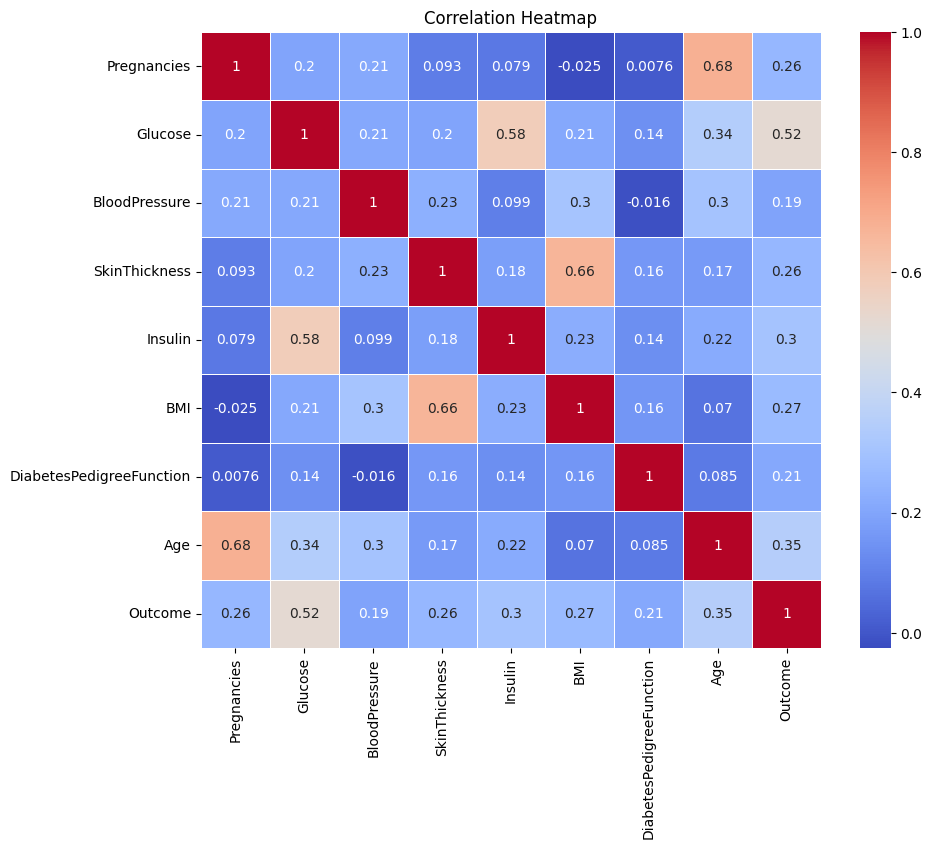

In [8]:
# Calculating the correlation matrix
correlation_matrix = filtered_diabetes.corr()

# Creating a heatmap using seaborn libary
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

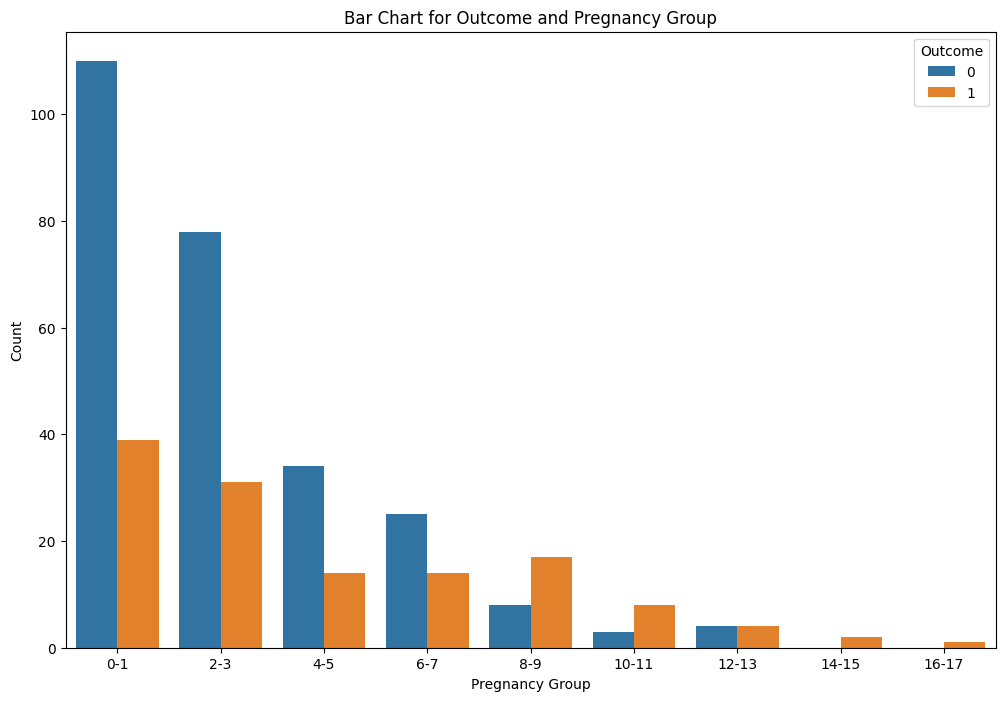

In [9]:
# Creating pregnancy groups and adding a new column 'PregnancyGroup' to the DataFrame
filtered_diabetes['PregnancyGroup'] = pd.cut(filtered_diabetes['Pregnancies'], bins=range(-1, 20, 2), labels=[f'{i}-{i+1}' for i in range(0, 20, 2)])
filtered_diabetes['PregnancyGroup'] = filtered_diabetes['PregnancyGroup'].astype(str)

# Converting 'PregnancyGroup' to string to avoid the '<' not supported error
filtered_diabetes['PregnancyGroup'] = filtered_diabetes['PregnancyGroup'].astype(str)

# Creating a vertically stacked bar chart using seaborn library
plt.figure(figsize=(12, 8))
sns.barplot(x='PregnancyGroup', y='Outcome', data=filtered_diabetes.sort_values(by="Pregnancies"), hue='Outcome', estimator=lambda x: len(x), ci=None)
plt.title('Bar Chart for Outcome and Pregnancy Group')
plt.xlabel('Pregnancy Group')
plt.ylabel('Count')
plt.show()

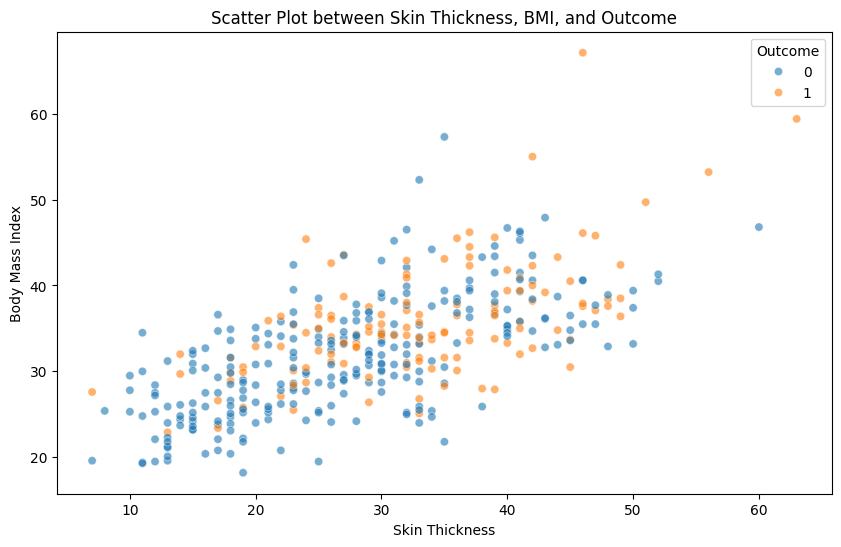

In [10]:
# Creating a scatter plot for Skinthickness and BMI with Outcome as the Hue

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SkinThickness', y='BMI', hue='Outcome', data=filtered_diabetes, alpha=0.6)
plt.title('Scatter Plot between Skin Thickness, BMI, and Outcome')
plt.xlabel('Skin Thickness')
plt.ylabel('Body Mass Index')
plt.show()

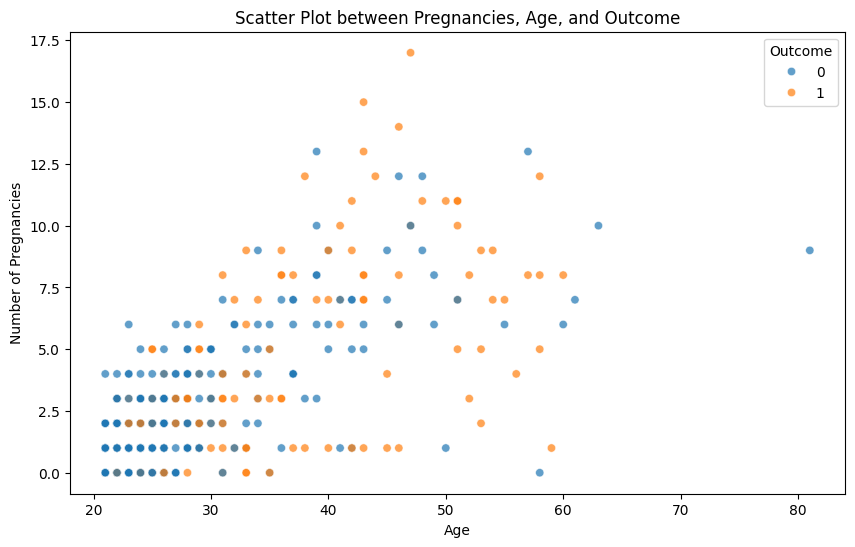

In [11]:
# Creating a scatter plot for Age and Number of Pregnancies with Outcome as the Hue

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=filtered_diabetes, alpha=0.7)
plt.title('Scatter Plot between Pregnancies, Age, and Outcome')
plt.xlabel('Age')
plt.ylabel('Number of Pregnancies')
plt.show()

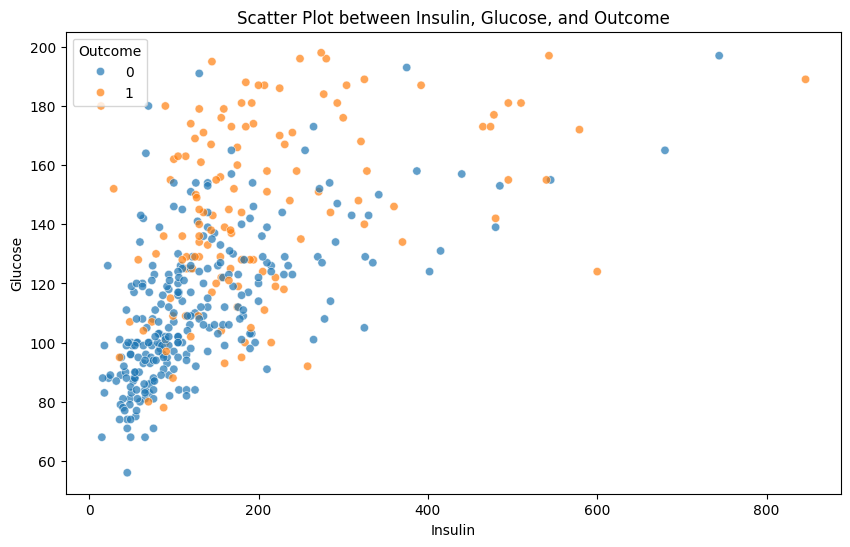

In [12]:
# Creating a scatter plot for Insulin and Glucose with Outcome as the Hue

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Insulin', y='Glucose', hue='Outcome', data=filtered_diabetes, alpha=0.7)
plt.title('Scatter Plot between Insulin, Glucose, and Outcome')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.show()

### Categorizing BMI and Age

In [13]:
# Defining the bins and labels for the BMI categories
bins = [float('-inf'), 18, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Creating a new column called BMI_Category
filtered_diabetes['BMI_Category'] = pd.cut(filtered_diabetes['BMI'], bins=bins, labels=labels, right=False)

# Defining the bins and labels for the Age categories
age_bins = [float('-inf'), 30, 50, 65, float('inf')]
age_labels = ['Early Life', 'Mid Life', 'Aging Period', 'Senior Citizens']

# Creating a new column called Age_Category
filtered_diabetes['Age_Category'] = pd.cut(filtered_diabetes['Age'], bins=age_bins, labels=age_labels, right=False)

# Displaying the DataFrame with the replaced 'BMI' and'Age' columns
filtered_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregnancyGroup,BMI_Category,Age_Category
3,1,89,66,23,94,28.1,0.167,21,0,0-1,Overweight,Early Life
4,0,137,40,35,168,43.1,2.288,33,1,0-1,Obese,Mid Life
6,3,78,50,32,88,31.0,0.248,26,1,2-3,Obese,Early Life
8,2,197,70,45,543,30.5,0.158,53,1,2-3,Obese,Aging Period
13,1,189,60,23,846,30.1,0.398,59,1,0-1,Obese,Aging Period
...,...,...,...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1,0-1,Obese,Early Life
755,1,128,88,39,110,36.5,1.057,37,1,0-1,Obese,Mid Life
760,2,88,58,26,16,28.4,0.766,22,0,2-3,Overweight,Early Life
763,10,101,76,48,180,32.9,0.171,63,0,10-11,Obese,Aging Period


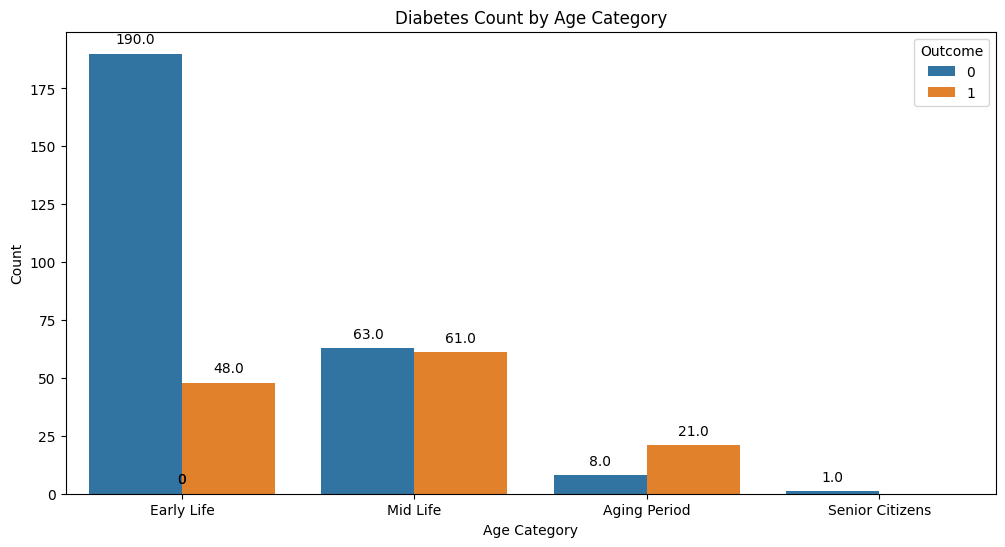

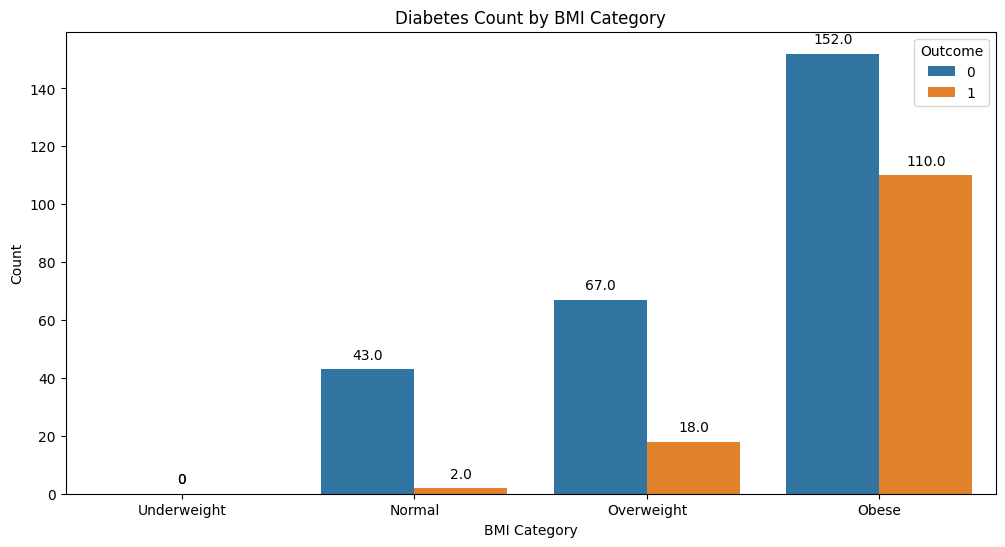

In [14]:
# Plotting Age_Category against Outcome 
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age_Category', hue='Outcome', data=filtered_diabetes)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Diabetes Count by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

# Plotting BMI_Category against Outcome
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='BMI_Category', hue='Outcome', data=filtered_diabetes)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Diabetes Count by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [15]:
# Deleting added category columns
del filtered_diabetes['PregnancyGroup']
del filtered_diabetes['BMI_Category']
del filtered_diabetes['Age_Category']

## Hypothesis Testing

#### Null Hypothesis (H0): There is no significant difference between the groups (filtered_diabetes_0 and filtered_diabetes_1) for the specified column.
  
#### Alternative Hypothesis (H1): There is a significant difference between the groups for the specified column.

In [16]:
# Creating two new DataFrames based on the 'Outcome' column
filtered_diabetes_0 = filtered_diabetes[filtered_diabetes['Outcome'] == 0]
filtered_diabetes_1 = filtered_diabetes[filtered_diabetes['Outcome'] == 1]

# Displaying the first few rows of each DataFrame
print("DataFrame for Outcome 0:")
filtered_diabetes_0

DataFrame for Outcome 0:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
27,1,97,66,15,140,23.2,0.487,22,0
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
747,1,81,74,41,57,46.3,1.096,32,0
751,1,121,78,39,74,39.0,0.261,28,0
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [17]:
print("\nDataFrame for Outcome 1:")
filtered_diabetes_1


DataFrame for Outcome 1:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174,88,37,120,44.5,0.646,24,1
740,11,120,80,37,150,42.3,0.785,48,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


In [18]:
# Specifying the columns to conduct the t-test
columns_of_interest = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initializing an empty dictionary to store p-values and t-statistics for each column
test_results = {}

# Iterating through columns and conducting t-test
for column in columns_of_interest:
    t_stat, p_value = ttest_ind(filtered_diabetes_0[column], filtered_diabetes_1[column])
    test_results[column] = {'t_statistic': t_stat, 'p_value': p_value}

# Displaying the results
for column, results in test_results.items():
    print(f"Results for {column}:")
    print(f"  - T-statistic: {results['t_statistic']}")
    print(f"  - P-value: {results['p_value']}")
    print()

Results for Pregnancies:
  - T-statistic: -5.242246822948837
  - P-value: 2.6051267615668623e-07

Results for Glucose:
  - T-statistic: -11.88690275607289
  - P-value: 5.0968747414453285e-28

Results for BloodPressure:
  - T-statistic: -3.8776478026014862
  - P-value: 0.00012374786935027583

Results for SkinThickness:
  - T-statistic: -5.228464463533362
  - P-value: 2.793219735125302e-07

Results for Insulin:
  - T-statistic: -6.243126964019698
  - P-value: 1.120794322841292e-09

Results for BMI:
  - T-statistic: -5.540362446544074
  - P-value: 5.5632211061090474e-08

Results for DiabetesPedigreeFunction:
  - T-statistic: -4.227588150278585
  - P-value: 2.9453459456583772e-05

Results for Age:
  - T-statistic: -7.397968469172896
  - P-value: 8.556692104109671e-13



#### All the p-values are very small, providing strong evidence to reject the null hypothesis for each variable. This suggests that there are significant differences in the specified variables between individuals with and without diabetes in the dataset.

#### The negative t-statistic values indicate that, for each variable, the mean value is significantly lower in individuals without diabetes compared to those with diabetes. The more negative the t-statistic, the more evidence there is against the null hypothesis of no difference between the groups.

#### Standardizing the Cleaned Dataset

In [19]:
# Excluding 'Outcome' Column
columns_to_standardize = filtered_diabetes.columns.difference(['Outcome'])

# Standardizing the other selected columns
scaler = StandardScaler()
filtered_diabetes[columns_to_standardize] = scaler.fit_transform(filtered_diabetes[columns_to_standardize])

In [20]:
# Standdardized Data set used for Analysis
filtered_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
4,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
6,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
8,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
13,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1
...,...,...,...,...,...,...,...,...,...
753,-1.029213,1.893894,1.389146,1.414319,2.982087,1.455225,-0.872478,-0.477514,1
755,-0.717427,0.174309,1.389146,0.938264,-0.388037,0.486384,1.547482,0.602213,1
760,-0.405640,-1.123491,-1.014673,-0.299477,-1.180016,-0.667678,0.704119,-0.870142,0
763,2.088650,-0.701706,0.427618,1.795162,0.201735,-0.026533,-1.020284,3.154296,0


## Now, applying Machine Learning Models to check if we can succesfully make predictions for the data

## 1. Linear Regression

In [21]:
# Creating another copy of dataset and appending encoded features to it
data_train = filtered_diabetes.copy()
data_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
4,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
6,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
8,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
13,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1


In [22]:
# Assigning the columns except 'Outcome' to X and setting our dependant column 'Outcome' to Y
X = data_train.drop('Outcome', axis=1)
Y = data_train['Outcome']

# Using 80-20 Split to train the Data
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Testing Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Testing Set Dimensions: (313, 8)
Validation Set Dimensions: (79, 8)


In [23]:
print(X_test.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object


In [24]:
# Initializing the logistic regression model
reg = LinearRegression()

# Training the model on the training set
reg.fit(X_train, Y_train)

LinearRegression()

In [25]:
reg.coef_

array([ 0.03576829,  0.19569733, -0.00945971,  0.0189468 ,  0.00561227,
        0.06383664,  0.06599781,  0.06404961])

In [26]:
reg.intercept_

0.3422193649017618

In [27]:
# Calculating Mean Absolute Error
mae = mean_absolute_error(Y_test, reg.predict(X_test))
print("Mean Absolute Error:", mae)

# Calculating Mean Squared Error
mse = mean_squared_error(Y_test, reg.predict(X_test))**0.5
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.30795713497404353
Mean Squared Error: 0.391884572512168


In [28]:
# Threshold for converting probabilities to binary predictions
threshold = 0.5

# Predicting probabilities on the test set
y_pred_proba = reg.predict(X_test)

# Converting probabilities to binary predictions based on the threshold
y_pred_binary = (y_pred_proba > threshold).astype(int)

# Calculating and printing confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculating and printing accuracy
accuracy1 = accuracy_score(Y_test, y_pred_binary)
print("Accuracy:", accuracy1)

# Calculating and printing precision
precision1 = precision_score(Y_test, y_pred_binary)
print("Precision:", precision1)

# Calculating and printing recall
recall1 = recall_score(Y_test, y_pred_binary)
print("Recall:", recall1)

Confusion Matrix:
[[51  7]
 [10 11]]
Accuracy: 0.7848101265822784
Precision: 0.6111111111111112
Recall: 0.5238095238095238


## 2. Logistic Regression

In [29]:
# Creating another copy of dataset and appending encoded features to it
data_train_2 = filtered_diabetes.copy()
data_train_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
4,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
6,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
8,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
13,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1


In [30]:
# Defining the features (X) and the target variable (y)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'DiabetesPedigreeFunction', 'BMI', 'Age']

target = 'Outcome'

X = data_train_2[features]
y = data_train_2[target]

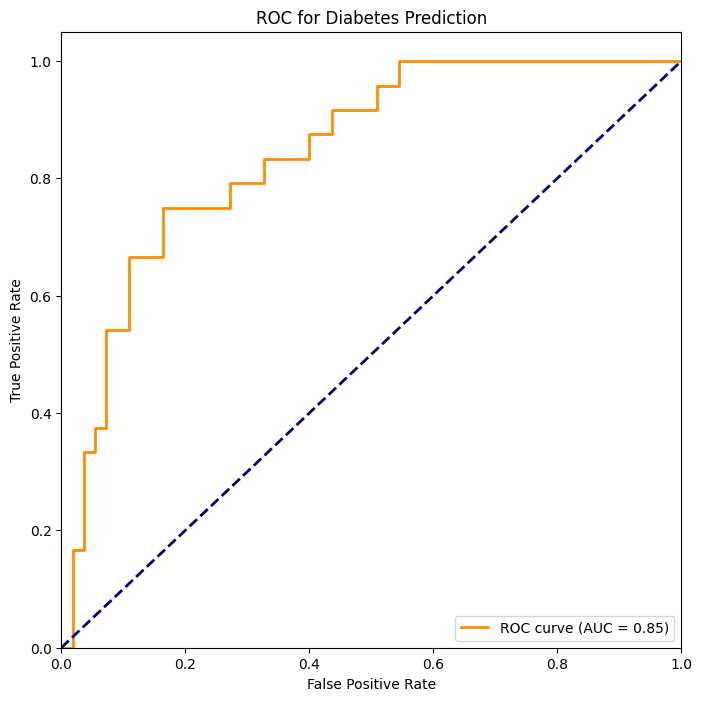

In [31]:
# Using 80-20 Split to train the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initializing the logistic regression model
model = LogisticRegression(random_state=42)

# Training the model on the training set
model.fit(X_train, y_train)

# Getting the predicted probabilities for class 1
pred_probs = model.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

# Calculating the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Diabetes Prediction')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Choosing the threshold based on the ROC curve before making predictions
threshold = 0.6

# Converting probabilities to binary predictions using the chosen threshold
binary_predictions = (pred_probs >= threshold).astype(int)

# Making predictions on the testing set
y_pred = model.predict(X_test)

In [33]:
# Creating a confusion matrix
conf_matrix_1 = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying the results
print("\nConfusion Matrix:")
print(conf_matrix_1)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[48  7]
 [ 8 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        55
           1       0.70      0.67      0.68        24

    accuracy                           0.81        79
   macro avg       0.78      0.77      0.77        79
weighted avg       0.81      0.81      0.81        79



In [34]:
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)

Accuracy: 0.810126582278481


In [35]:
# Calculating Mean Squared Error
mse_2 = mean_squared_error(y_test, binary_predictions)
print(f"Mean Squared Error: {mse_2:.4f}")

# Calculating Mean Absolute Error
mae_2 = mean_absolute_error(y_test, binary_predictions)
print(f"Mean Absolute Error: {mae_2:.4f}")

Mean Squared Error: 0.2025
Mean Absolute Error: 0.2025


## 3. Random Forest Regression

In [36]:
# Creating another copy of dataset and appending encoded features to it
data_train_3 = filtered_diabetes.copy()
data_train_3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
4,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
6,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
8,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
13,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1


In [37]:
# Defining the features (X) and the target variable (y) for regression
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'DiabetesPedigreeFunction', 'BMI', 'Age']

target = 'Outcome'  

X = data_train_3[features]
y = data_train_3[target]

In [38]:
# Using 80-20 Split to train the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fitting the model to the training set
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [39]:
# Making predictions on the training set and testing set
y_pred_train = random_forest_reg.predict(X_train)
y_pred_test = random_forest_reg.predict(X_test)

In [40]:
y_pred_test

array([0.19141196, 0.23266917, 0.        , 0.41545   , 0.94      ,
       0.1202381 , 0.15      , 0.05      , 0.49      , 0.11231672,
       0.34996084, 0.255     , 0.23141196, 0.0802381 , 0.66071786,
       0.130625  , 0.66      , 0.0986158 , 0.65585866, 0.5692    ,
       0.        , 0.57071786, 0.74      , 0.01      , 0.0860945 ,
       0.03052632, 0.64      , 0.199375  , 0.525     , 0.01      ,
       0.446     , 0.69342222, 0.03828571, 0.11714286, 0.26125   ,
       0.69714286, 0.        , 0.3825    , 0.165625  , 0.93      ,
       0.621625  , 0.20152228, 0.08238412, 0.66509286, 0.        ,
       0.44510866, 0.07844298, 0.94      , 0.01      , 0.03923077,
       0.23      , 0.14018577, 0.44475   , 0.21725   , 0.34069767,
       0.702625  , 0.3792928 , 0.        , 0.        , 0.11      ,
       0.        , 0.03076441, 0.64880952, 0.36699863, 0.        ,
       0.06925   , 0.01      , 0.25375   , 0.18149992, 0.7       ,
       0.        , 0.03      , 0.15083333, 0.94      , 0.01071

In [41]:
# Calculating Mean Absolute Error for training and testing sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)

Mean Absolute Error (Train): 0.1087731074146234
Mean Absolute Error (Test): 0.2932900643517571


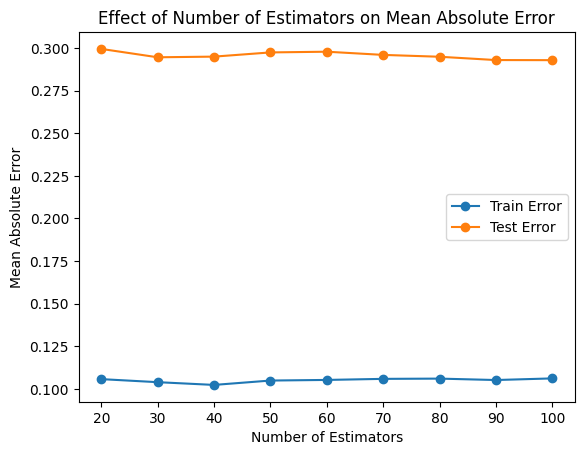

In [42]:
# Plotting train and test errors for different number of estimators
N_estimators = [20, 30, 40, 50, 60, 70, 80, 90, 100]
train_errors = []
test_errors = []

for n_estimator in N_estimators:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimator, max_depth=12, min_samples_split=2, random_state=42)
    rf_regressor.fit(X_train, y_train)
    train_errors.append(mean_absolute_error(y_train, rf_regressor.predict(X_train)))
    test_errors.append(mean_absolute_error(y_test, rf_regressor.predict(X_test)))

# Plotting the results
plt.plot(N_estimators, train_errors, marker='o', label='Train Error')
plt.plot(N_estimators, test_errors, marker='o', label='Test Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('Effect of Number of Estimators on Mean Absolute Error')
plt.legend()
plt.show()


In [43]:
# Initialize RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the training set and testing set
y_pred_train = random_forest_classifier.predict(X_train)
y_pred_test = random_forest_classifier.predict(X_test)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy3 = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy3)

# Calculate and print precision
precision3 = precision_score(y_test, y_pred_test)
print("Precision:", precision3)

# Calculate and print recall
recall3 = recall_score(y_test, y_pred_test)
print("Recall:", recall3)

Confusion Matrix:
[[45  7]
 [11 16]]
Accuracy: 0.7721518987341772
Precision: 0.6956521739130435
Recall: 0.5925925925925926


## 4. Ridge and Lasso

In [44]:
data_train_4 = filtered_diabetes.copy()
data_train_4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,0
4,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1
6,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1
8,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1
13,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1


In [45]:
X = data_train_4[features]
y = data_train_4[target]

In [46]:
# Using 80-20 Split to train the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test,y_pred)
print('Mean Absolute error Ridge :', mae_ridge, 'Mean Square error Ridge :', mean_squared_error(y_test,y_pred)**0.5)

Mean Absolute error Ridge : 0.326231827175112 Mean Square error Ridge : 0.4151249659483519


In [47]:
# Convert regression predictions to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy4 = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy4)

# Calculate and print precision
precision4 = precision_score(y_test, y_pred_binary)
print("Precision:", precision4)

# Calculate and print recall
recall4 = recall_score(y_test, y_pred_binary)
print("Recall:", recall4)

Confusion Matrix:
[[45  7]
 [12 15]]
Accuracy: 0.759493670886076
Precision: 0.6818181818181818
Recall: 0.5555555555555556


In [48]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test,y_pred)
print('Mean Absolute error Lasso :', mae_lasso, 'Mean Square error Lasso :', mean_squared_error(y_test,y_pred)**0.5)


Mean Absolute error Lasso : 0.4459093298823149 Mean Square error Lasso : 0.4744736075816724


In [49]:
# Convert regression predictions to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy5 = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy5)

# Calculate and print precision
precision5 = precision_score(y_test, y_pred_binary)
print("Precision:", precision5)

# Calculate and print recall
recall5 = recall_score(y_test, y_pred_binary)
print("Recall:", recall5)

Confusion Matrix:
[[52  0]
 [27  0]]
Accuracy: 0.6582278481012658
Precision: 0.0
Recall: 0.0


### Finally displaying all Mean Absolute Errors for all models

In [50]:
print('Mean Absolute Error for Linear Regression', mae)
print('Mean Absolute Error for Logistic Regression', mae_2)
print('Mean Absolute Error for Random Forrest Regression', mae_test)
print('Mean Absolute Error for Ridge Regression', mae_ridge)
print('Mean Absolute Error for Lasso Regression', mae_ridge)

Mean Absolute Error for Linear Regression 0.30795713497404353
Mean Absolute Error for Logistic Regression 0.20253164556962025
Mean Absolute Error for Random Forrest Regression 0.2932900643517571
Mean Absolute Error for Ridge Regression 0.326231827175112
Mean Absolute Error for Lasso Regression 0.326231827175112


### Finally displaying all Accuracy for all models

In [51]:
print('Accuracy for Linear Regression', accuracy1)
print('Accuracy for Logistic Regression', accuracy2)
print('Accuracy for Random Forrest Classifier', accuracy3)
print('Accuracy for Ridge Regression', accuracy4)
print('Accuracy for Lasso Regression', accuracy5)

Accuracy for Linear Regression 0.7848101265822784
Accuracy for Logistic Regression 0.810126582278481
Accuracy for Random Forrest Classifier 0.7721518987341772
Accuracy for Ridge Regression 0.759493670886076
Accuracy for Lasso Regression 0.6582278481012658


## In conclusion :

#### 1. According to our exploratory analysis : People who are younger than 30 have a lower risk of diabetes and people who are in their middle age are more prone to diabetes.
#### 2. According to our exploratory analysis : People who have a BMI of more than 30 that is, they are overweight or obese have a much higher chance of diabetes as compared to people who are below 30 on the BMI scale.
#### 3. Age, Pregnancies, Glucose had extremely small p-values which means that these three column values were statistically very different for people who have and do not have diabetes.
#### 4. Overall, the null hypothesis was rejected and it can be said that people who have diabetes have very different parameters for the same column as people who do not have diabetes.
#### 5. According the the machine learning models above : Logistic regression gives the best output for mean absolute error with a 20% chance of wrong prediction for the test data which is lower than the other two models and it also has the highest accuracy and hence I would pick it to make future predictions